---

<h1 style="text-align: center;font-size: 40px;">Анализ данных продаж видеоигр на PlayStation4</h1>

---
### Подготовили студенты Б06-004 группы: Иванов Денис и Черванева Кристина

In [1]:
#Подключаем все необходимые библиотеки
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import numpy as np
from scipy import stats
import scipy.stats as sps
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Загрузим файл csv формата с нужными данными и выведем первые 5 строк данных

data = pd.read_csv('PS4_GamesSales.csv', encoding='cp1251')
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
#Выводим количество строк и столбцов объекта DataFrame

data.shape

(1034, 9)

## Описание признаков

### Характеристики:
+ Game - название игры
+ Year - год релиза
+ Genre - игровой жанр
+ Publisher - разработчик
+ North Americа - продажи в Северной Америке (в миллионах)
+ Europe - продажи в Европе (в миллионах)
+ Japan - продажи в Японии (в миллионах)
+ Rest of World - продажи в остальном мире (в миллионах)
+ Global - общемировые продажи (в миллионах)

In [7]:
#Выводим информацию о структуре и типах данных в каждом столбце объекта DataFrame.


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


## Общая информация

In [8]:
#Выводим сводную статистическую информацию о числовых данных

data.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Уже сейчас мы можем сделать некоторые выводы:
+ В данной базе данных рассмариваются продажи игр с 2013 го 2020 годы
+ Продажи по всему миру лежат в диапазоне от 0.0 (по некоторым играм не указаны все данные) до 19.39 млн долларов
+ В среднем игры на PS4 покупают чаще всего в Европе, продажи чуть больше чем в Северной Америке. Рынок видеоигр на PS4 в основном лежит в этих двух регионах

# Визуализация статистических данных

## Игр какого жанра было выпущено больше всего?

In [9]:
#Возвращаем количество уникальных значений в столбце "Genre" объекта DataFrame 

data['Genre'].value_counts()

Action              258
Role-Playing        123
Misc                123
Adventure            97
Shooter              89
Sports               71
Racing               48
Platform             46
Action-Adventure     40
Fighting             35
Strategy             28
Simulation           23
Music                19
Puzzle               16
MMO                   8
Visual Novel          8
Party                 2
Name: Genre, dtype: int64

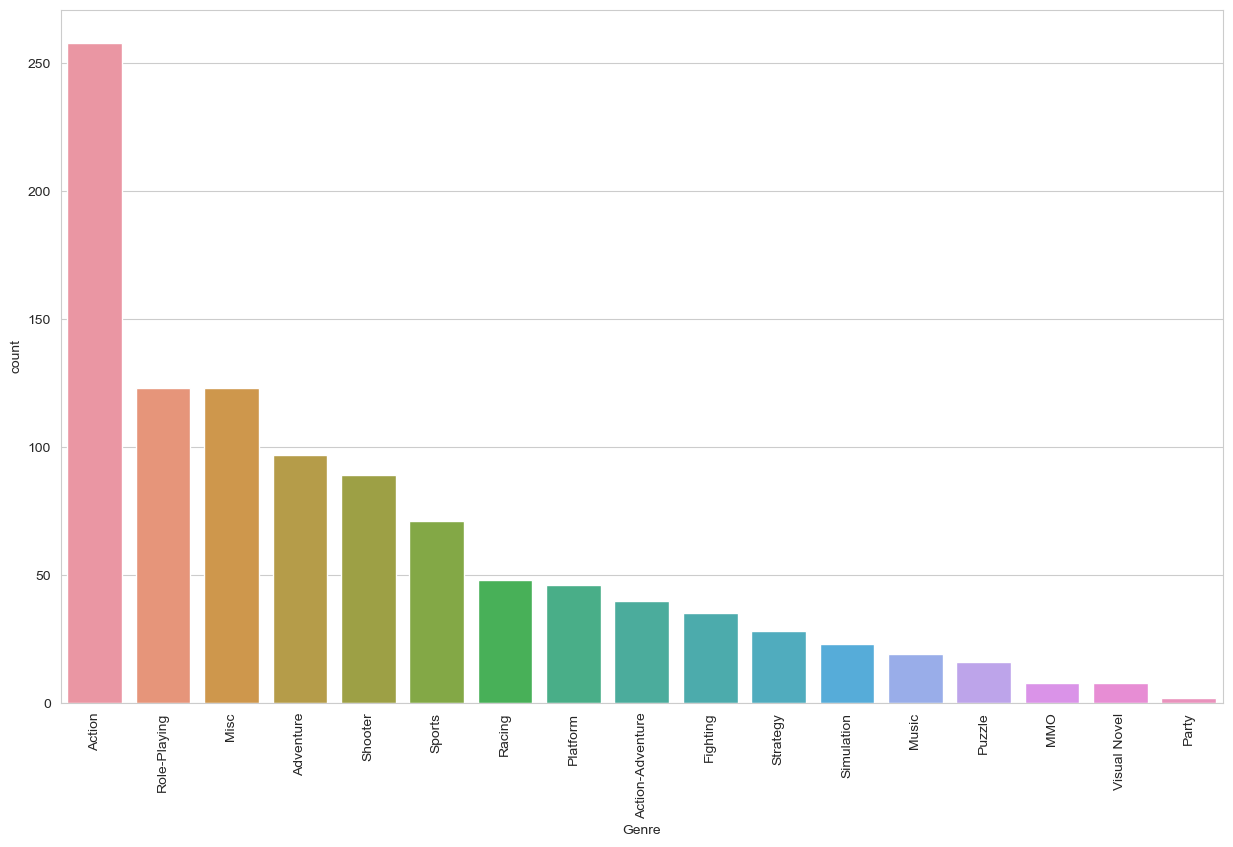

In [10]:
#Визуализируем распределение количества видеоигр в каждом жанре и выявляем наиболее популярные жанры в наборе данных

plt.figure(figsize=(15, 9))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90);

Видим, что игры жанра Экшн составляют лидирующее большинство (свыше 250) среди видеоигр на PS4. Меньше всего игр типа Вечеринка, Визуальная новелла и ММО (около 20). Это может быть связано с тем, пользователи могут УДОБНО контролировать персонажей с помощью гейм-пада. К тому же, многие эксклюзивы для платформы PlayStation - представители жанра Action, а компании Sony очень выгодно выпускать игры только для своей платформы.


## Какой год стал самым продуктивным для выпуска игр на PS4?

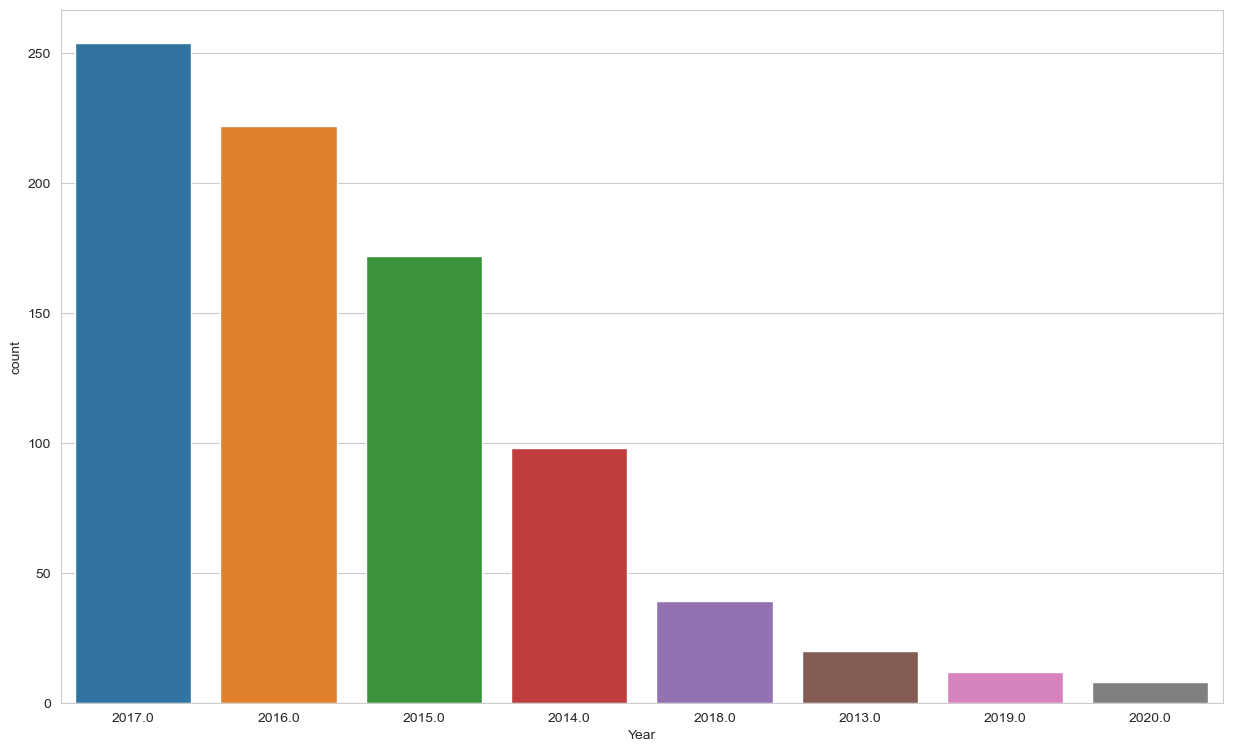

In [19]:
#Визуализируем распределение количества видеоигр, выпущенных в каждый год

plt.figure(figsize=(15, 9))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Game'].count().sort_values(ascending=False).index)
plt.xticks();

Как можно заметить, с 2013 года (год выхода PS4) игровая индустрия в этой области начала монотонно расти, достигая своего пика в 2017 году. В 2018 году случился резкий обвал, т.к. была официально подтверждена разработка PS5. Абсолютный минимум достигнут в 2020, в связи со стартом продаж PS5.

## Распределение по жанрам игр в 2013-2020 годах

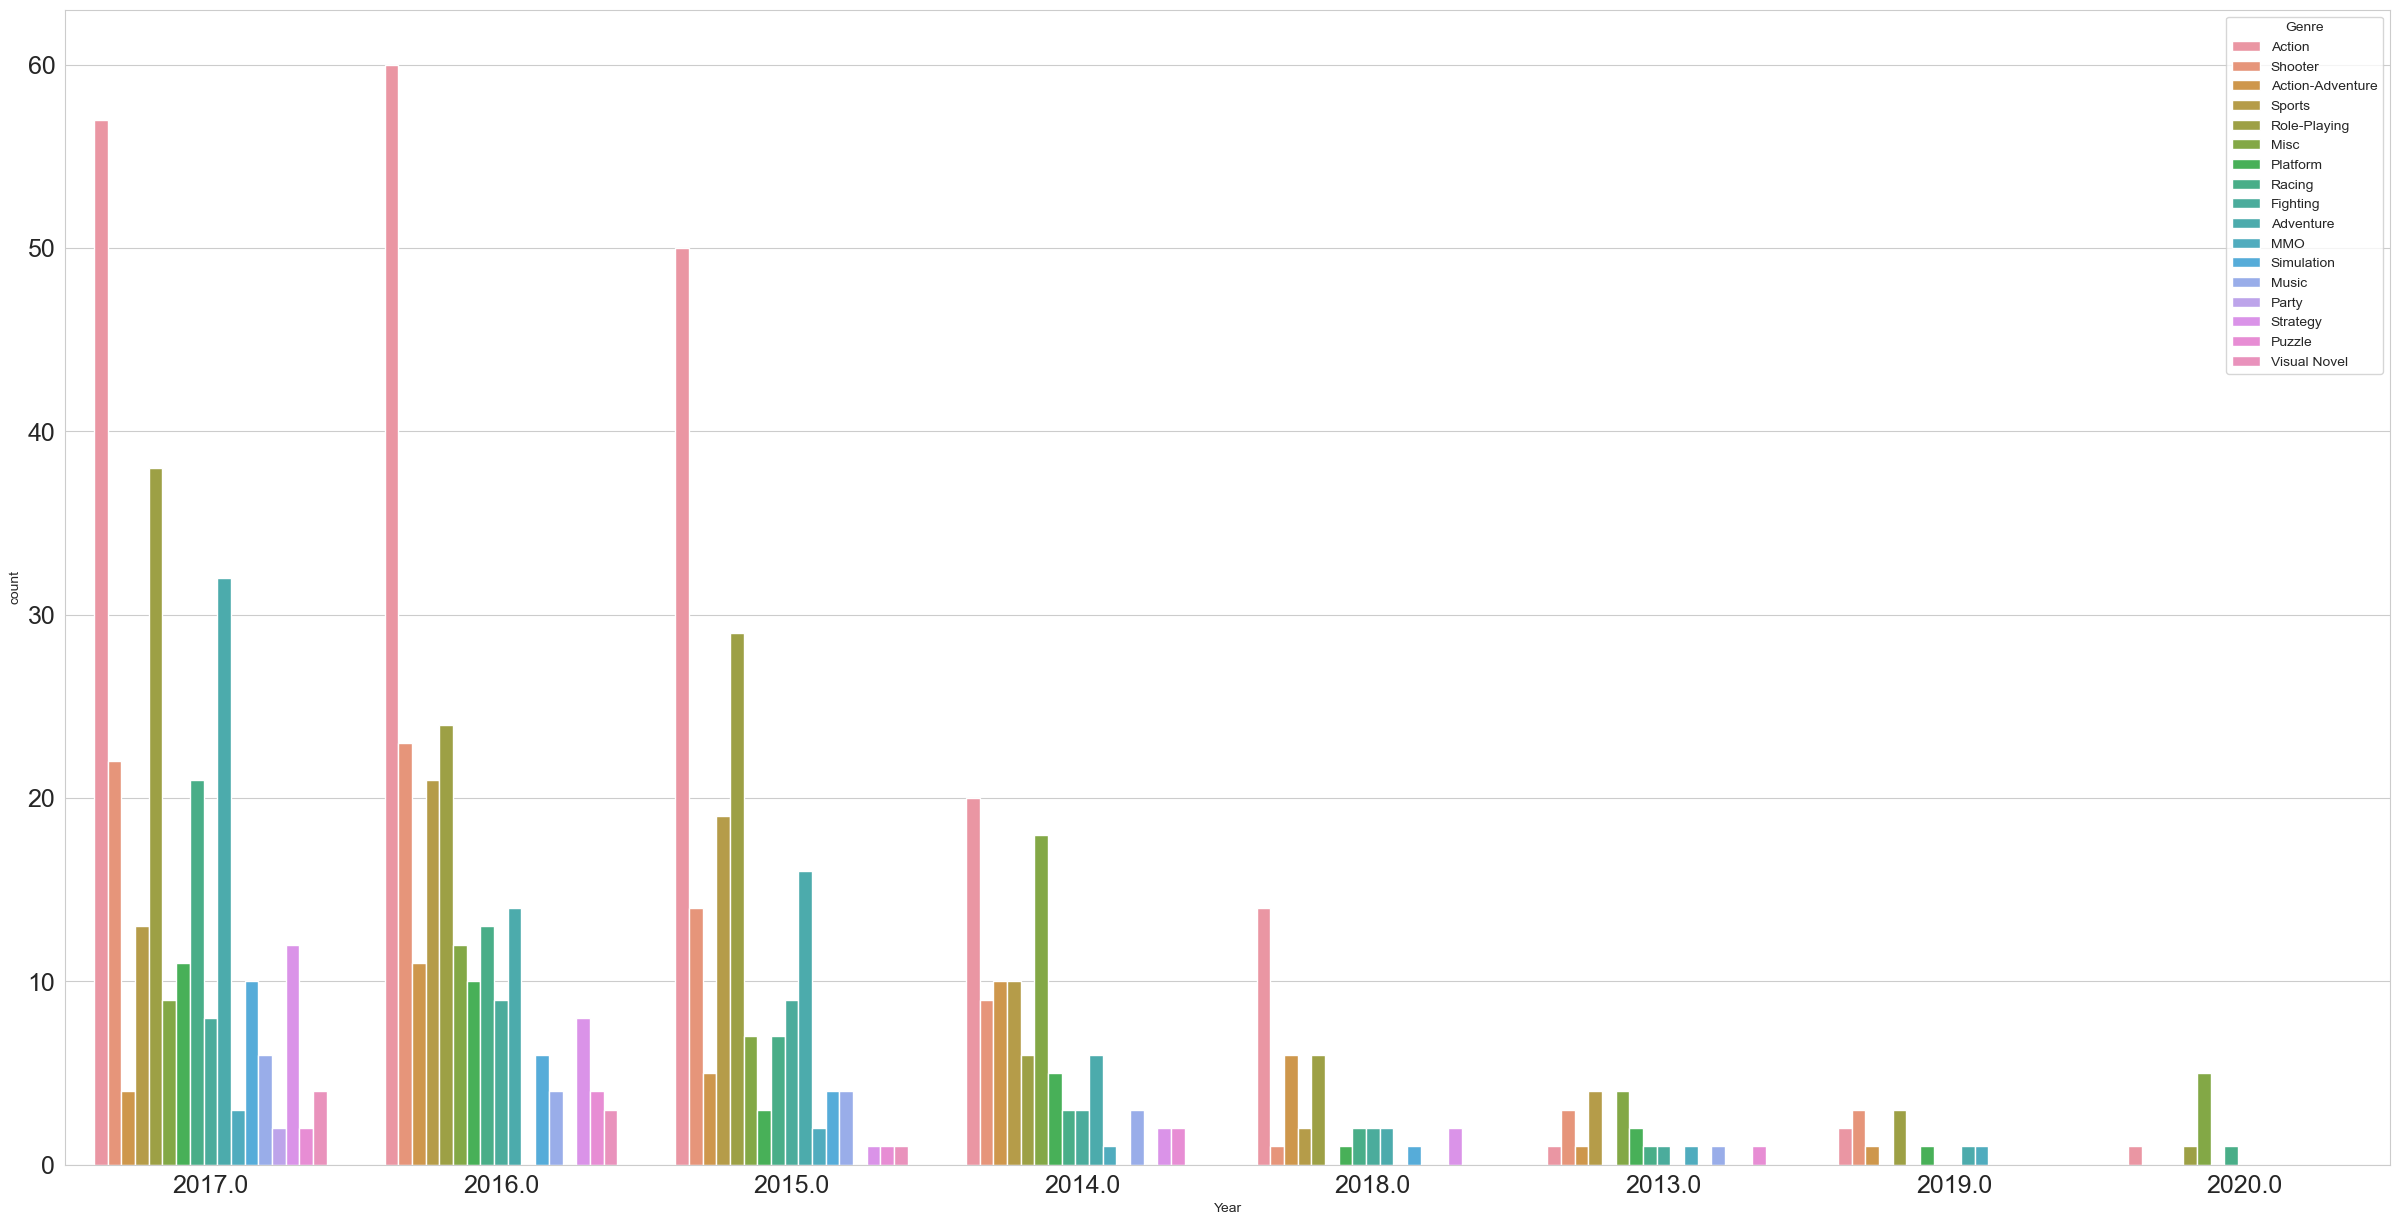

In [20]:
plt.figure(figsize=(30, 15))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:8].index)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

Самое равномерное распределение игр по жанрам было в 2014 году (но все равно видно лидерство жанров Action и Misc). Рассвет жанра Action пришелся на 2016 год, Role-Playing - на 2017, а Adventure - тоже на 2017 год.

## В каком году были самые высокие продажи по всему миру? 

In [14]:
#Этот код позволяет получить данные об общей глобальной продаже игр по годам выпуска и подготовить их для дальнейшего анализа
#и визуализации

data_year = data.groupby(by=['Year'])['Global'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global'], ascending=False)

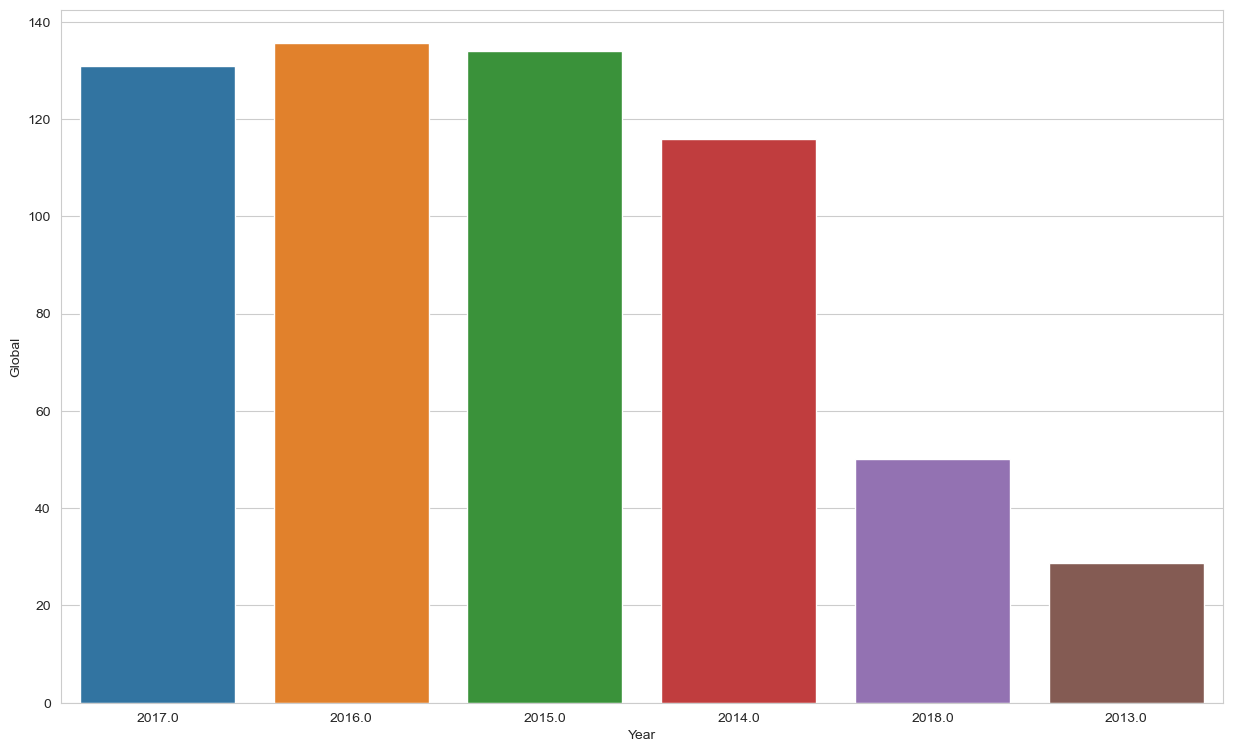

In [21]:
plt.figure(figsize=(15, 9))
sns.barplot(x="Year", y="Global", data=data_year, order=data.Year.value_counts().iloc[:6].index)
plt.xticks();

Здесь рассматриваем продажи с 2013 по 2018 годы, т.к. в нашей БД нет данных по продажам в 2019 и 2020 годах. 
По соотношению "количество выпусков игр - годовая продажа" лидирует 2014 год (это заметно, если вернуться к пункту "Какой год стал самым продуктивным для выпуска игр на PS4"). Самые высокие продажи наблюдаются в период с 2014 по 2017 годы.

## В какие годы было выпущено наибольшее количество игр одного жанра?

In [16]:
#Группируем данные по столбцам "Year" и "Genre", считаем количество игр в каждой группе, сбрасываем индексы, создаем новый 
#объект "year_max_df"
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count') 

#Создаем объект, который содержит логические значения, указывающие, является ли количество игр каждого жанра в каждом году 
#максимальным для данного года
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']

#Из объекта "year_max_df" выбираем строки, которые содержат максимальное количество игр в каждом году для каждого жанра, затем
#в результате сброса индексов сохраняем результат в объекте "year_max_genre"
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

#Удаляем дубликаты строк в объекте "year_max_genre", оставляем только строки с последним значением в столбце "count" для каждого
#года, сбрасываем индексы и сохраняем окончательный результат
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

In [17]:
genre = year_max_genre['Genre'].values
# genre[0]

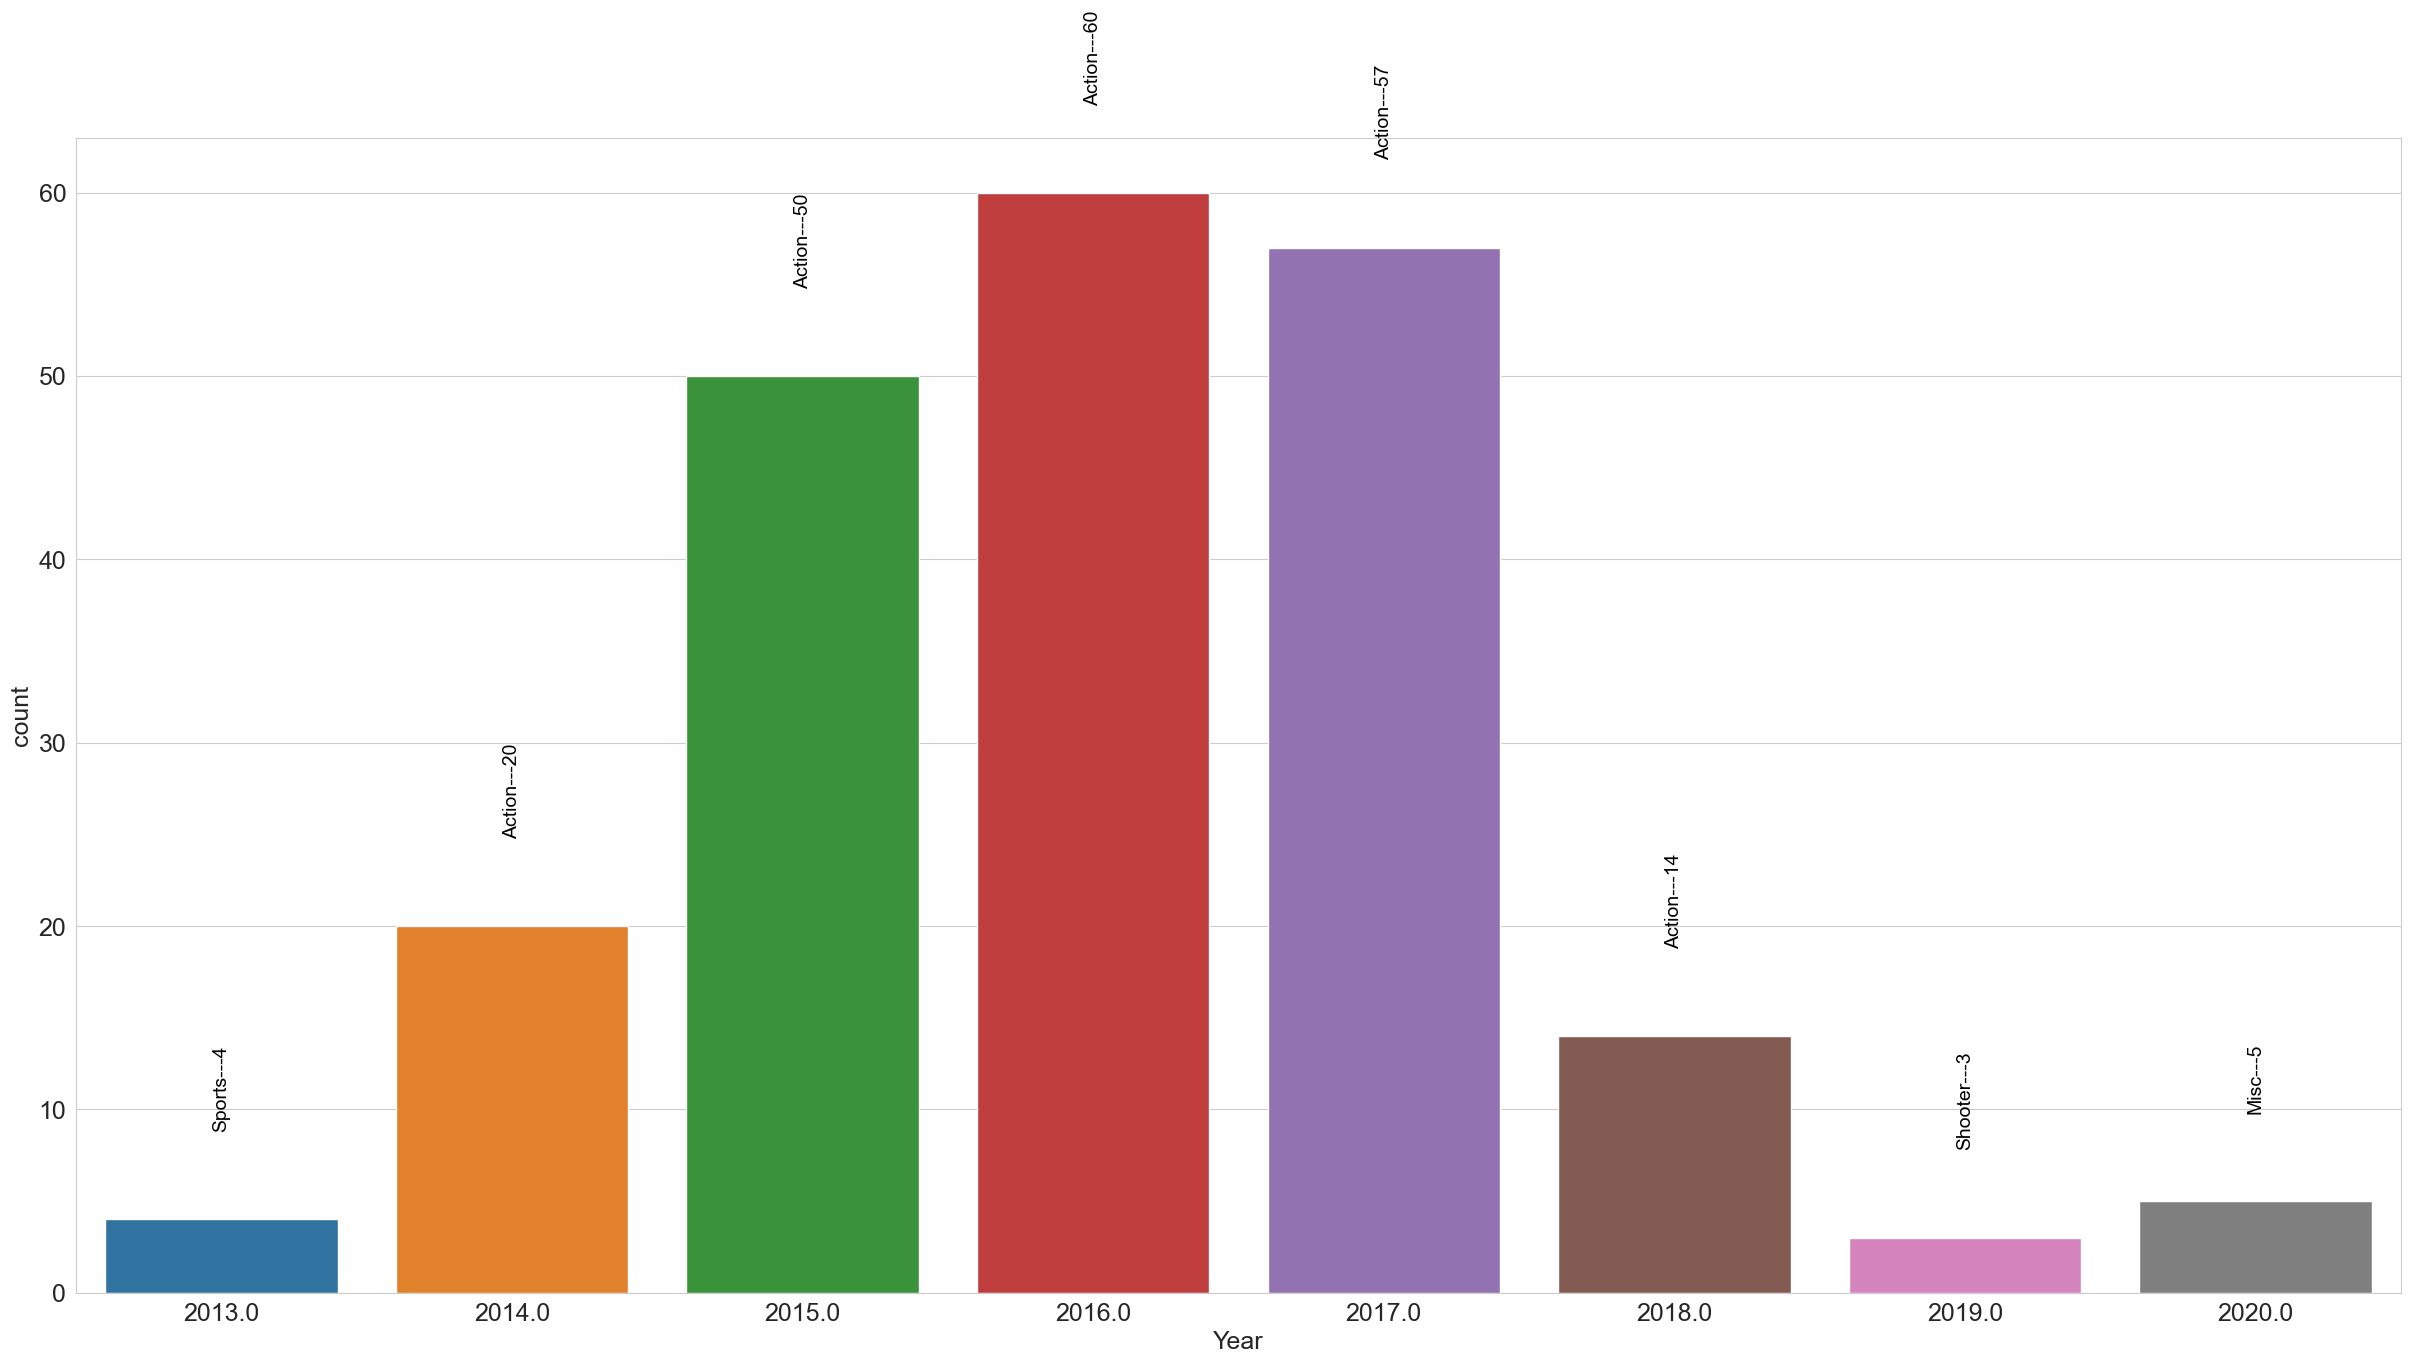

In [22]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '---' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xlabel('Year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Наиболее продуктивными в жанре Action были года с 2014 по 2018.

## Игры какого жанра имеют самые высокие продажи в мире?

In [23]:
#Получаем сводную информацию о глобальных продажах игр по каждому жанру, отсортированную по убыванию

data_genre = data.groupby(by=['Genre'])['Global'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global'], ascending=False)
# data_genre

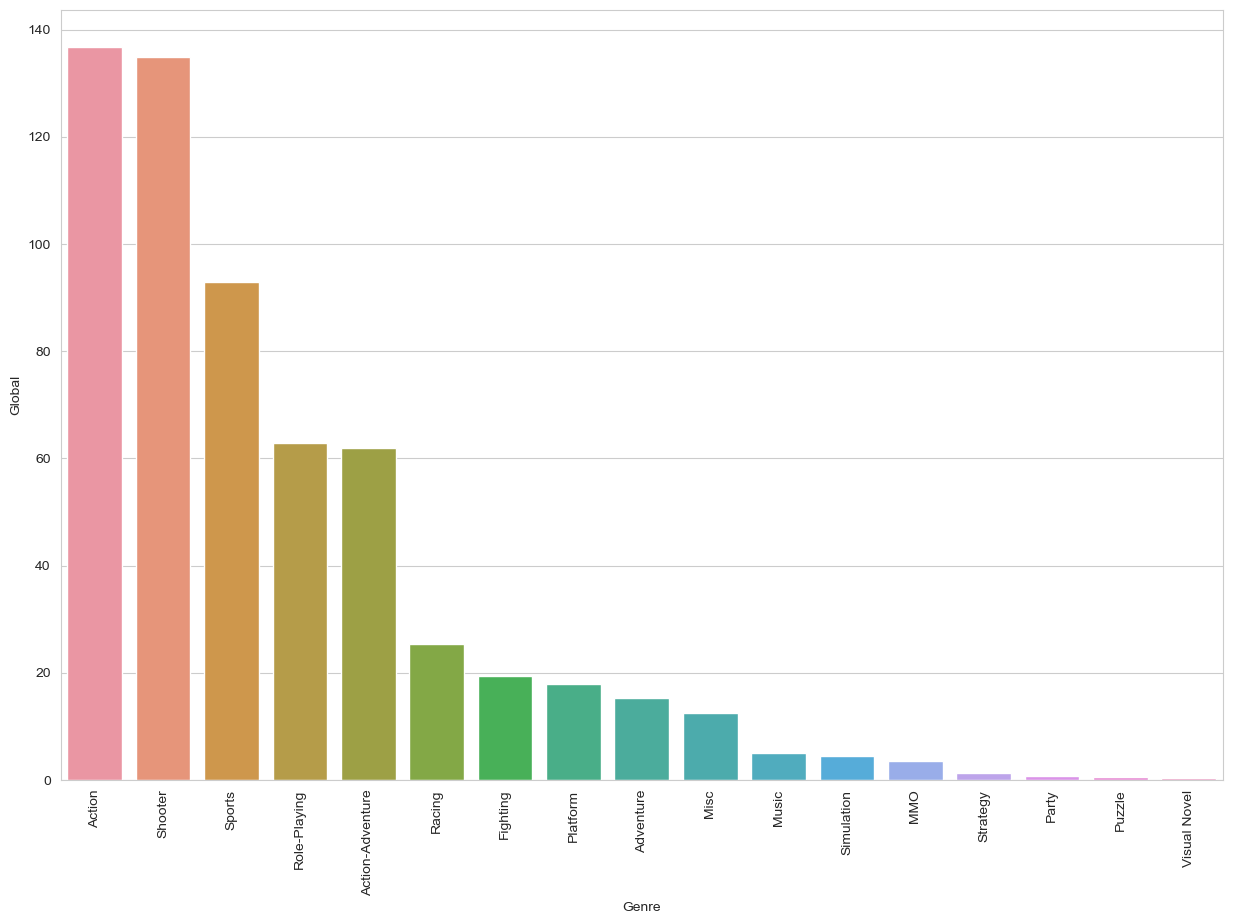

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global", data=data_genre)
plt.xticks(rotation=90);

Несмотря на то, что игры в жанре Shooter заимают только 5-ю строчку по количеству релизов, они почти не отстают по продажам от игр в жанре Action. А вторые по выпускаемости игры в жанре Role-Playing занимают только 4-е место по суммарным продажам.
Также стоит отметить, что игры в жанре Sports, несмотря на их малое количество релизов (даже не входят в ТОП-5), занимают аж 3-е место по продажам.

## Какие игры в каждом жанре принесли самый большой доход?

Строим 12 горизонтальных столбчатых диаграмм для каждого жанра игр, на которых отображены топ-10 игр в этом жанре с наибольшими глобальными продажами.


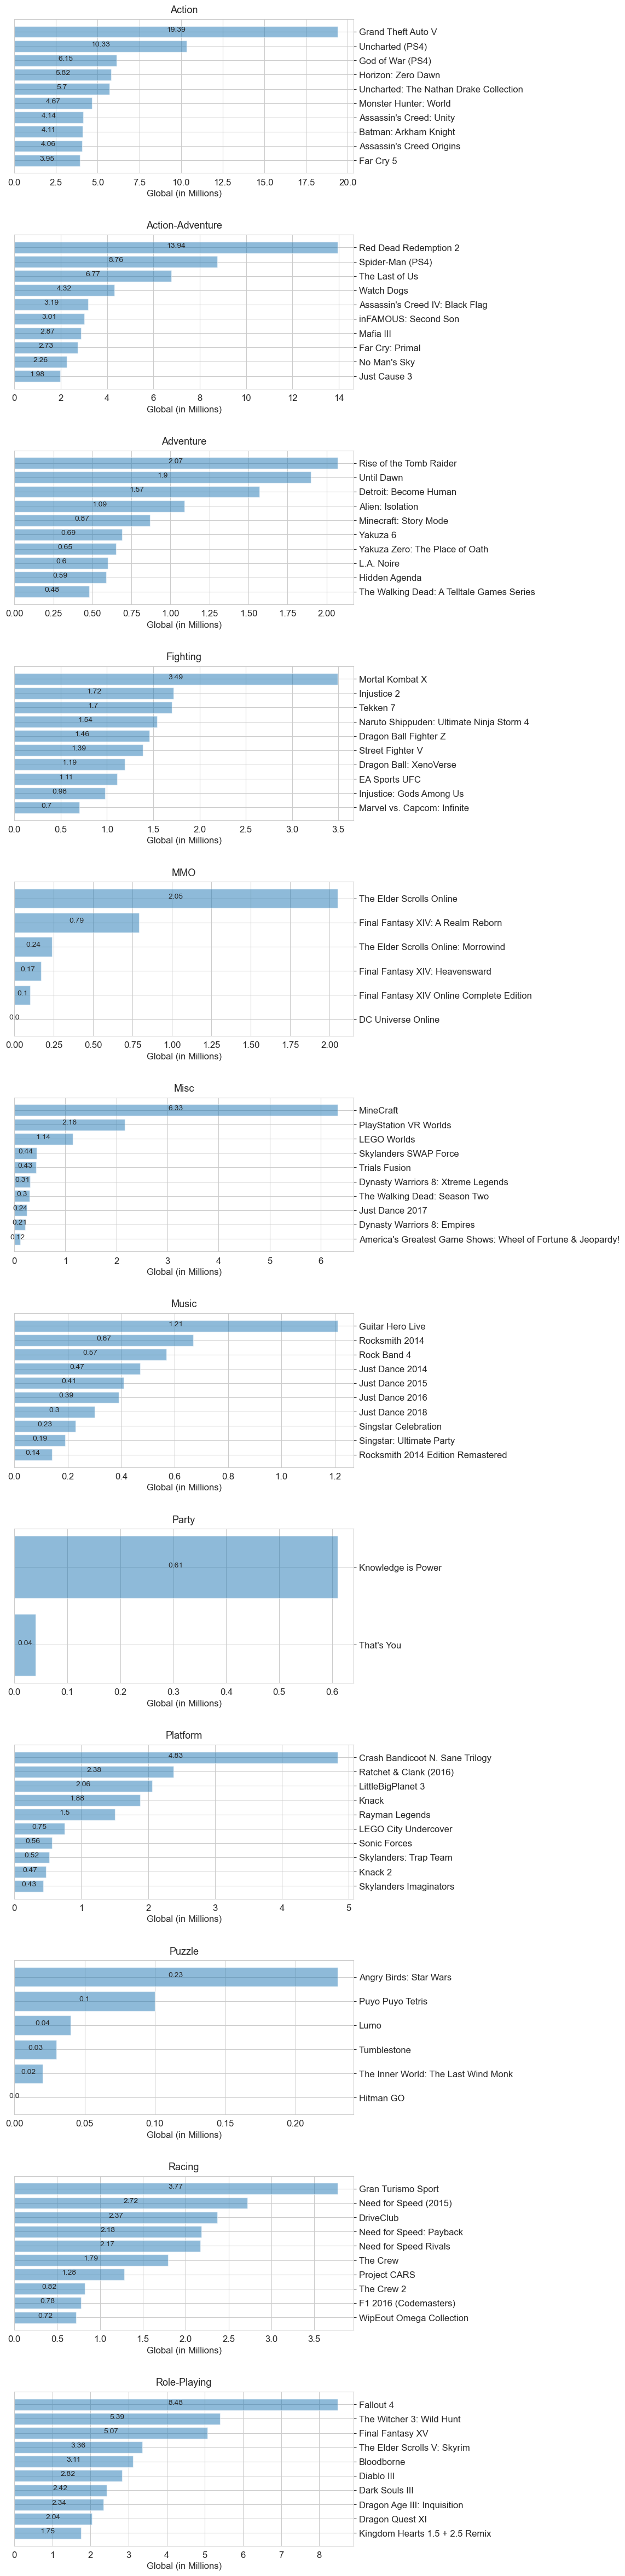

In [27]:
#Группируем данные по играм, суммируем глобальные продажи каждой игры в новый DataFrame
title_sales = data.groupby('Game')['Global'].sum()

#Выбираем столбцы "Game" и "Genre", сохраняем их в новый DataFrame
title_genres = data[['Game', 'Genre']]

#Объединяем данные из 2-х DataFrame по столбцу "Game" и создаем индекс DataFrame "res" из двух столбцов: "Genre" и "Game"
res = pd.merge(title_sales, title_genres, on='Game').set_index(['Genre', 'Game'])
res = res.sort_index()

#Создаем фигуру с 12 подграфиками
fig, axes = plt.subplots(12, 1, figsize=(8, 60))

#Выбираем из "res" все игры одного жанра
genres = res.reset_index()['Genre'].unique() 
for i in range(12):
    genre = genres[i]
    rec = res.loc[genre].sort_values(by='Global') #сортировка по убыванию глобальных продаж
    rec = rec.drop_duplicates()[-10:] #удаляем все дубликаты и выбираем топ-10 (последние 10 строк)
    axes[i].barh(rec['Global'].index, rec['Global'].values, alpha=0.5)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
    axes[i].set_title(genre, fontsize=13, y=1.01)
    axes[i].set_xlabel('Global (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    s = rec['Global']
    for j in s.index:
        axes[i].text(s.loc[j] / 2, j, round(s.loc[j], 2), ha='center')
fig.subplots_adjust(hspace=0.4)

## Какая игра имеет самые высокие продажи в мире?

In [28]:
#Создаем датафрейм с информацией о 20-ти самых продаваемых играх на PS4
top_game_sale = data.head(20)

#Выбираем из исходного датафрейма столбцы 'Game', 'Year', 'Genre' и 'Global'
top_game_sale = top_game_sale[['Game', 'Year', 'Genre', 'Global']]

#Сортируем по убыванию 'Global'
top_game_sale = top_game_sale.sort_values(by=['Global'], ascending=False)
# top_game_sale

In [29]:
name = top_game_sale['Game']
year = top_game_sale['Year']
y = np.arange(0, 20)

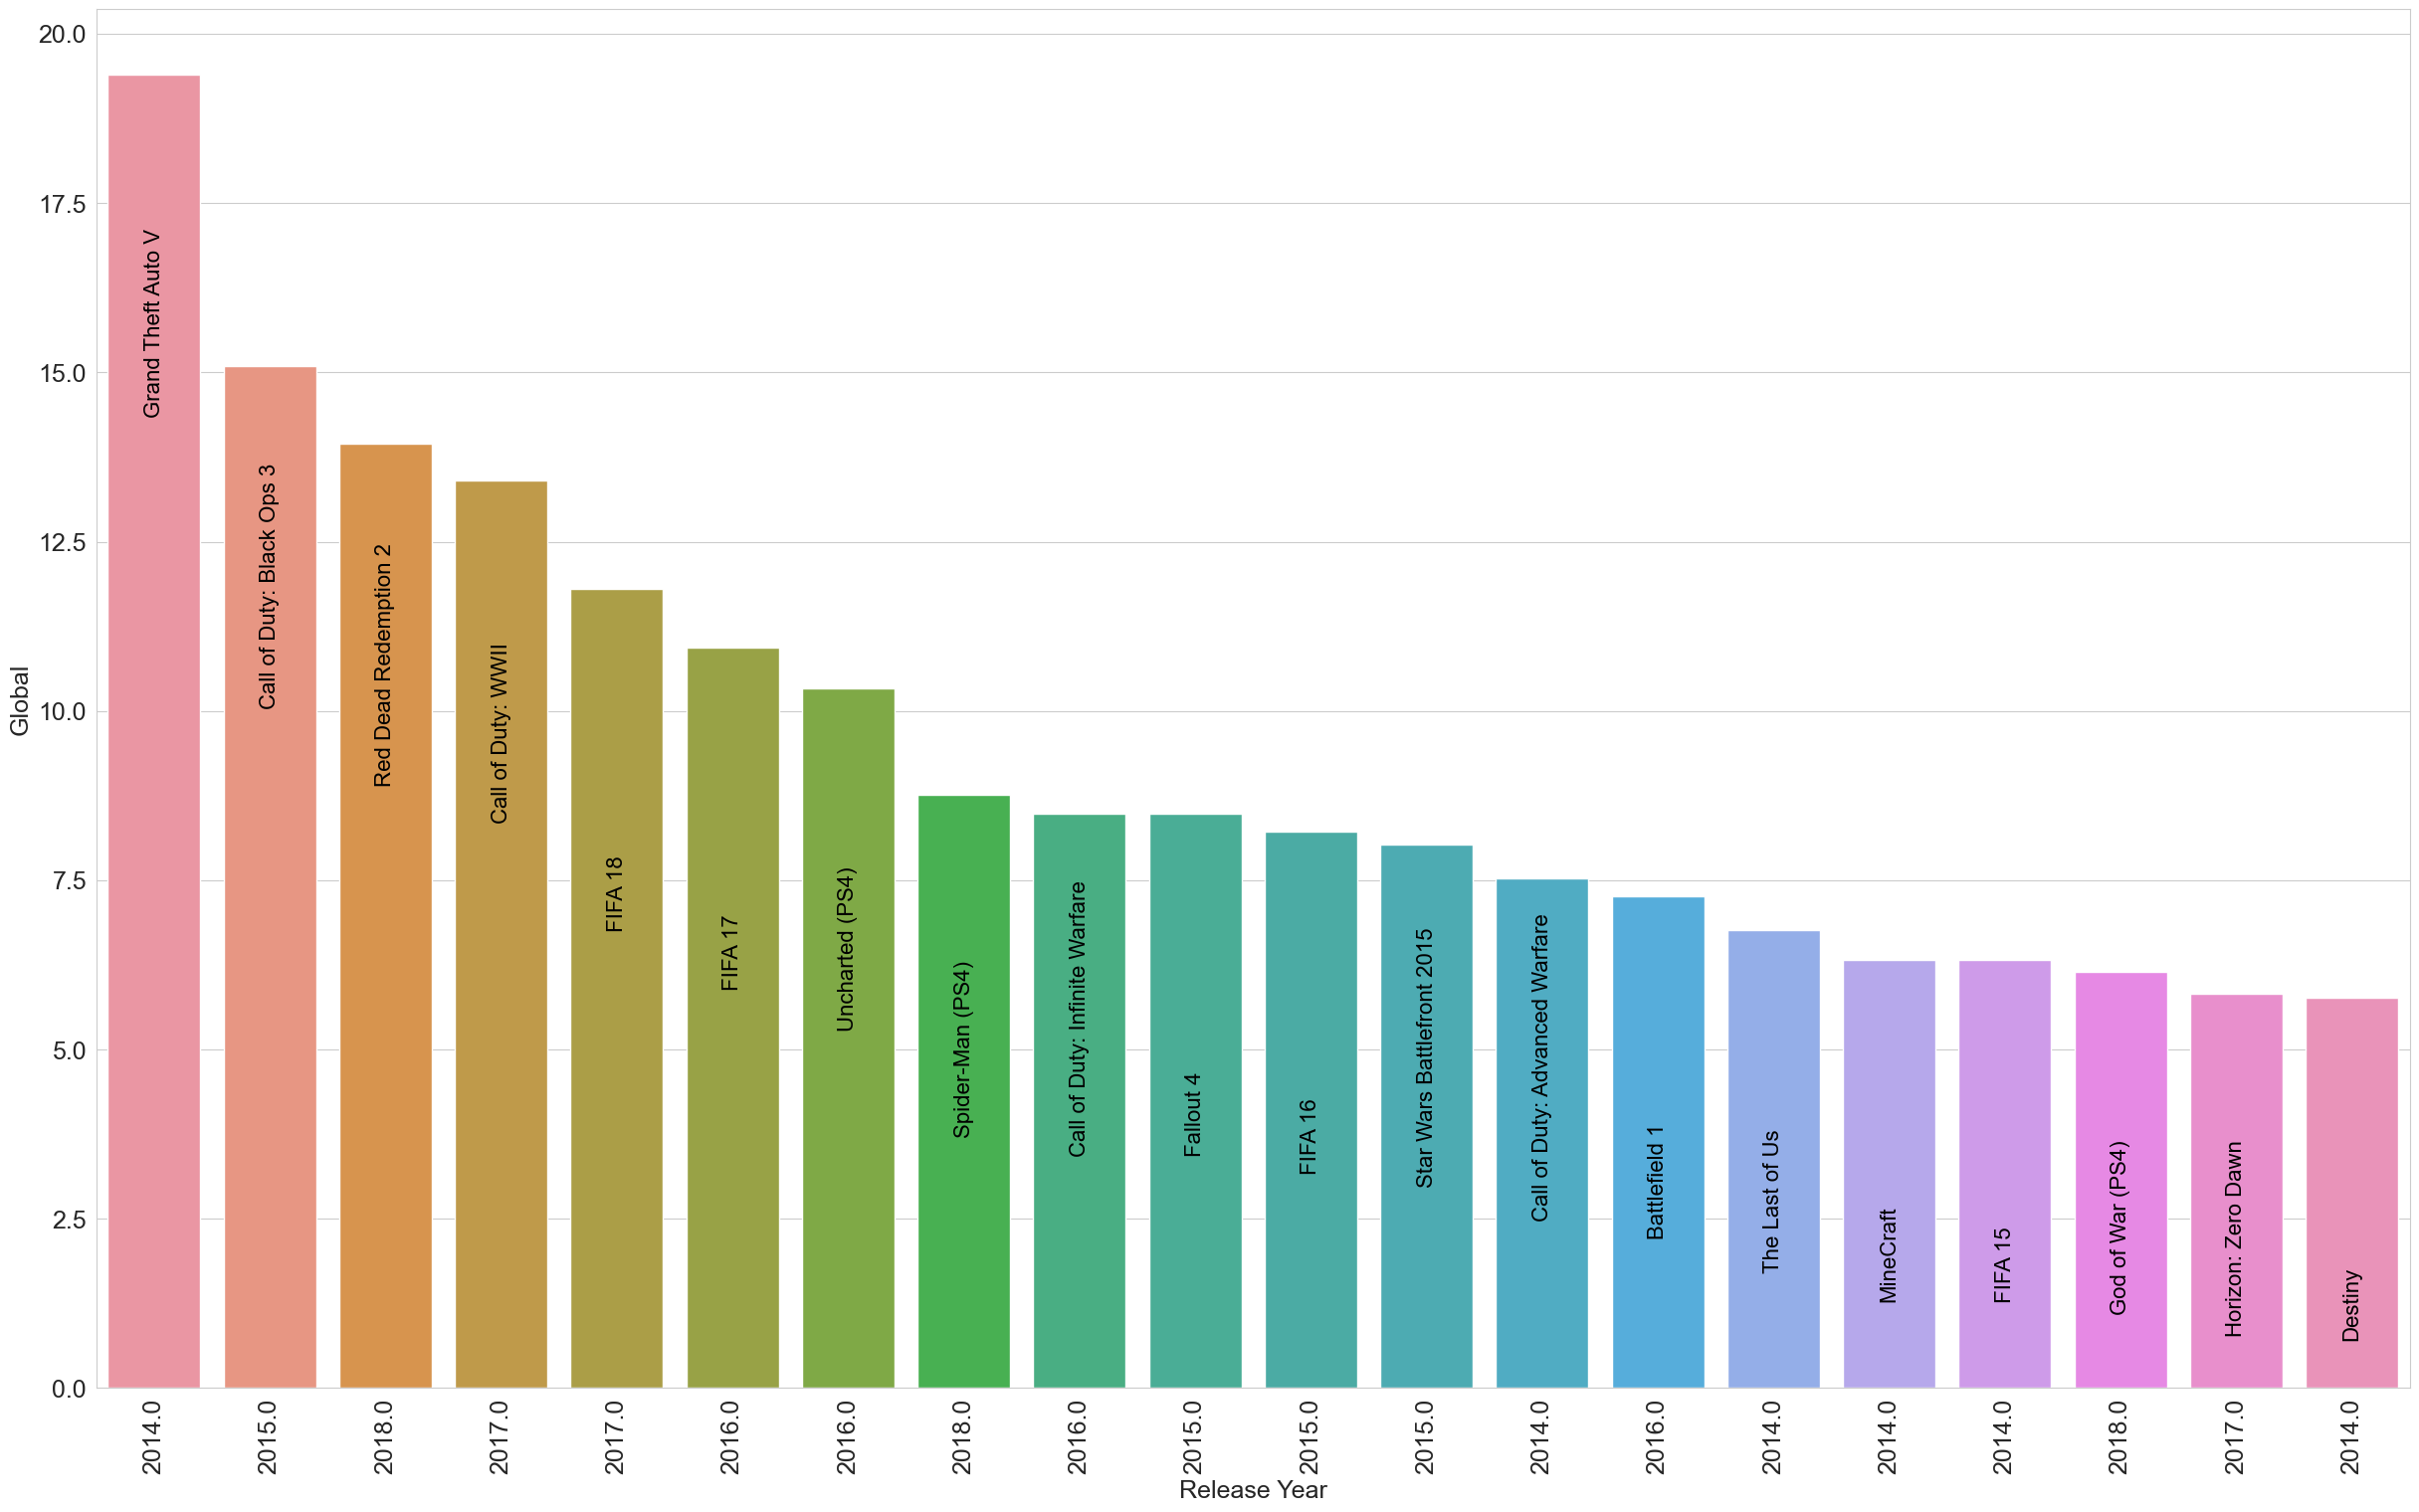

In [30]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Game', y='Global', data=top_game_sale)
index = 0
for value in top_game_sale['Global']:
    g.text(index, value - 5, name[index], color='#000', size=16, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=18, rotation=90)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Global', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Можем заметить, что самыми продаваемыми играми на PS4 стали: "GTA V", "Call of Duty: Black Ops 3" и "RDR 2".

# Перейдём к сравнениям

## Сравнение продаж по жанрам

In [32]:
#Создает датафрейм, который содержит столбцы жанров и всех регионов
comp_genre = data[['Genre', 'North America', 'Europe', 'Japan', 'Rest of World']]
# comp_genre

#Группируем данные по столбцу Жанров, суммируем продажи каждого жанра в каждом регионе
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

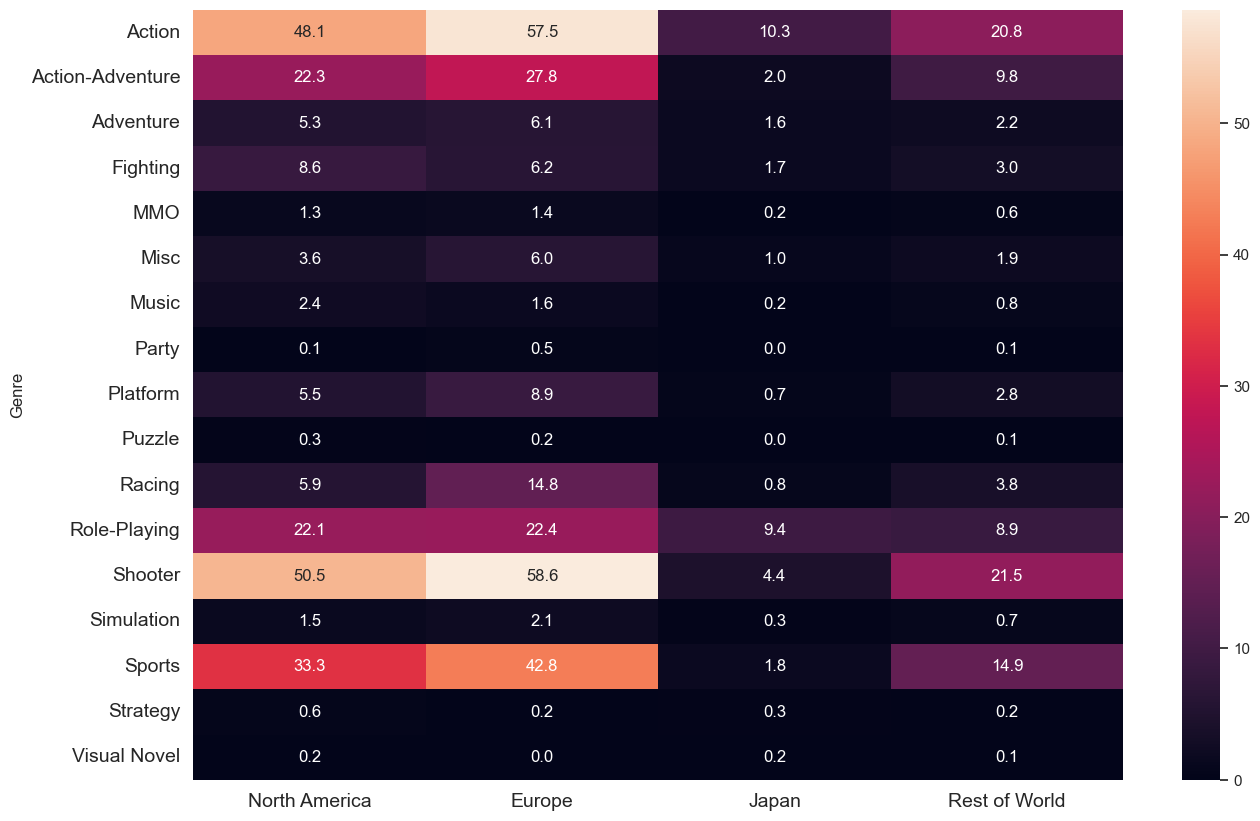

In [33]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f') #создаем тепловую карту

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [34]:
#создаем таблицу comp_table из comp_map 
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['North America', 'Europe', 'Japan', 'Rest of World'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,North America,48.15
1,Action-Adventure,North America,22.30
2,Adventure,North America,5.27
3,Fighting,North America,8.58
4,MMO,North America,1.32


<AxesSubplot: xlabel='Genre', ylabel='Sale_Price'>

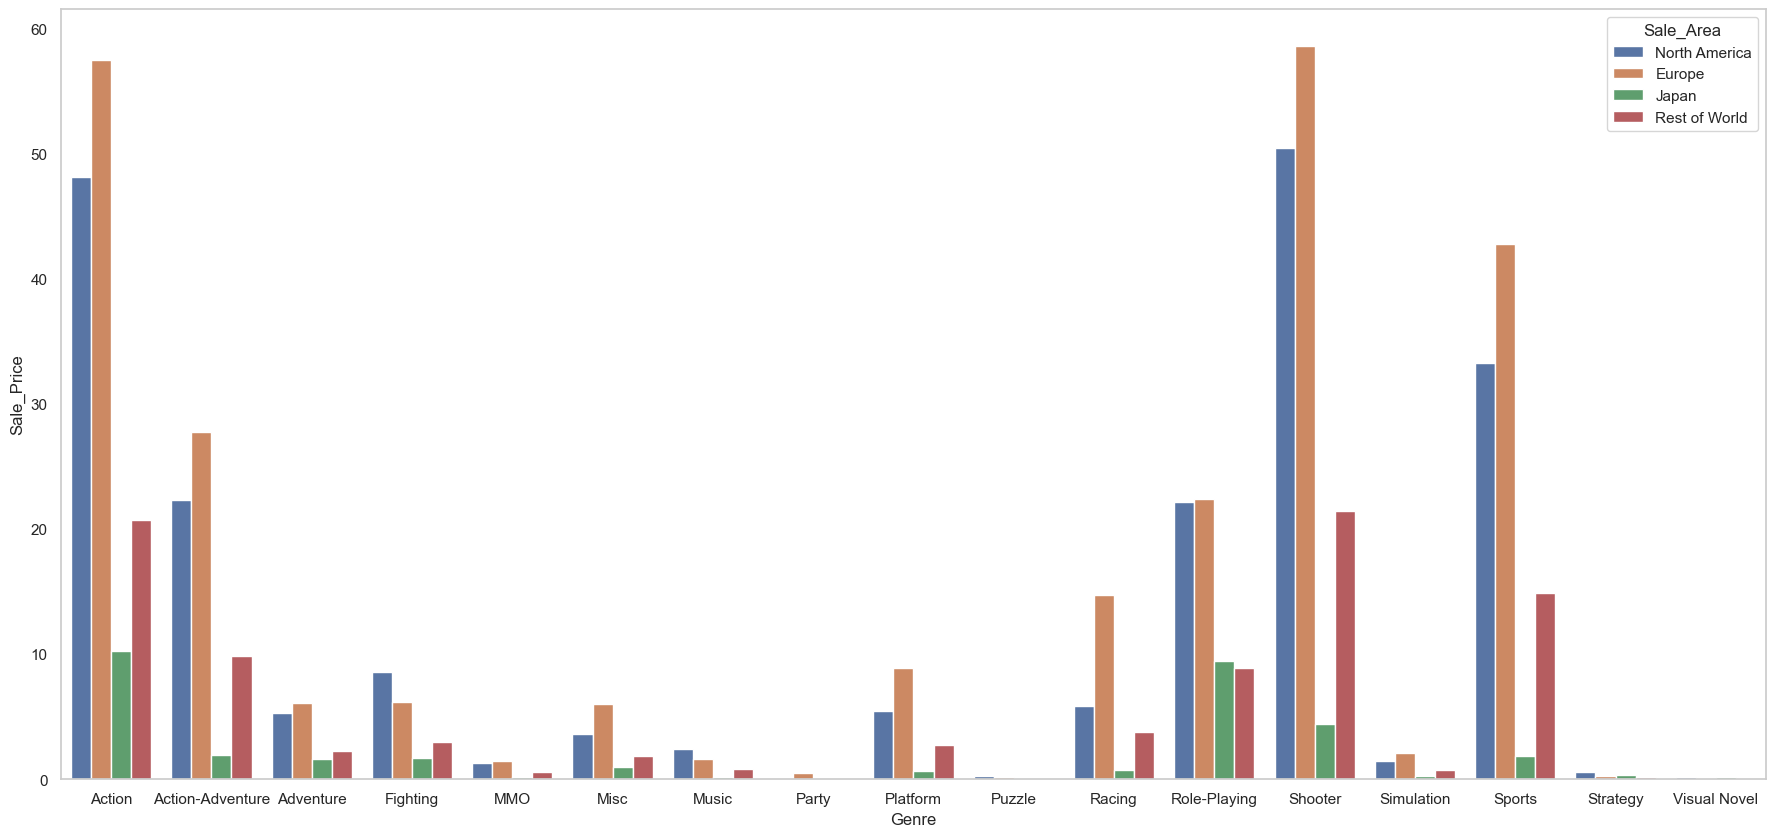

In [35]:
plt.figure(figsize=(22, 10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

Европа занимает лидирующую позицию по продажам всех жанров игр на PS4. Только в жанре Fighting Северная Америка не намного опережает Европу. Заметен интересный факт: в Японии на 2 месте после Action стоят игры в жанре Role-Playing, что можно объяснить культурой данной страны.

## ТОП-20 издателей

In [36]:
#Создаем новый датафрейм с 2-мя столбцами:'Publisher' и 'Year'
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

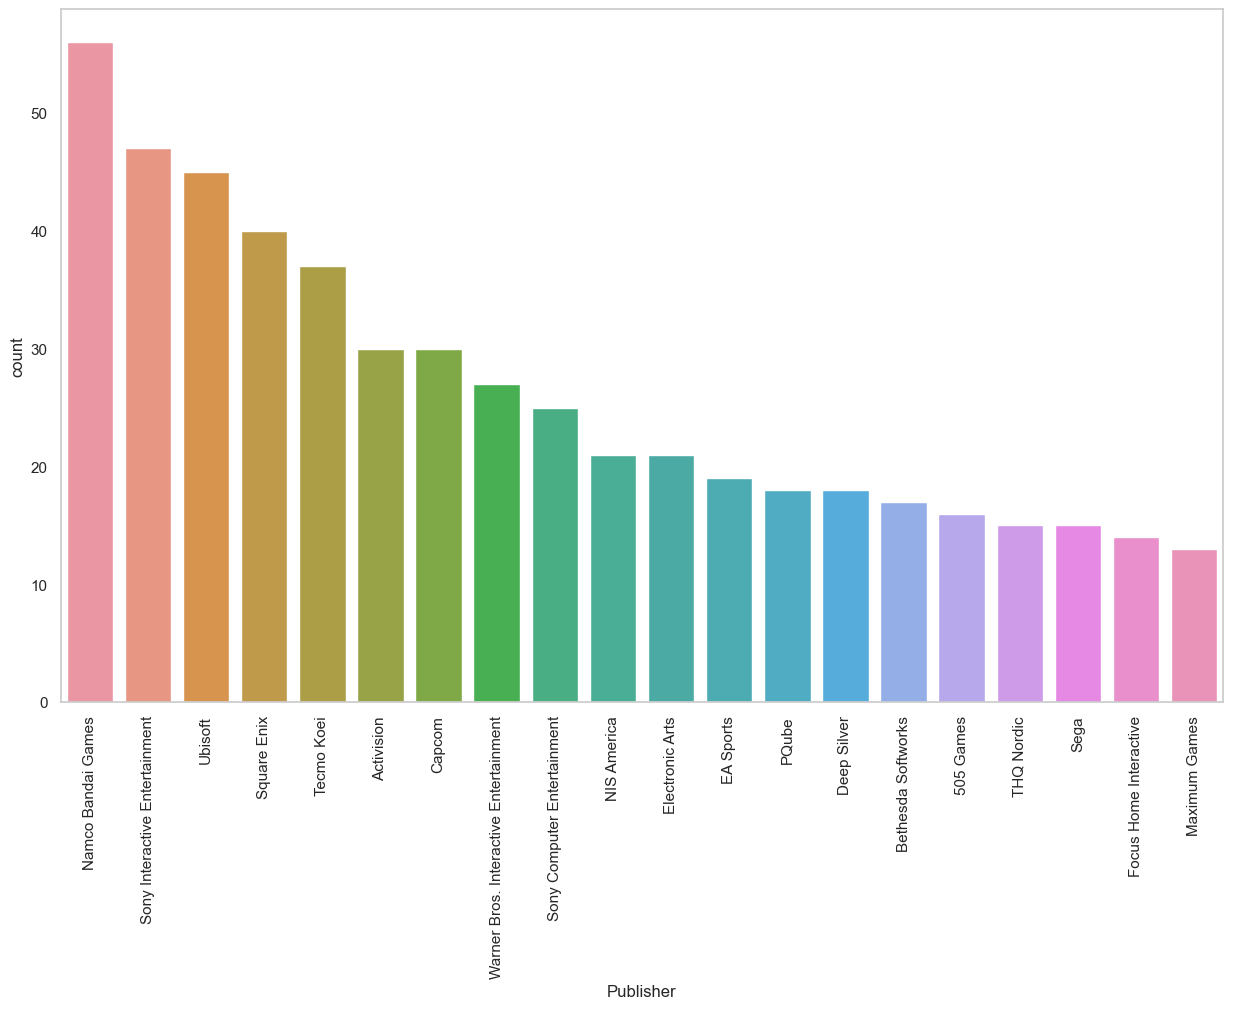

In [37]:
plt.figure(figsize=(15, 9))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90);

Крупнейшие студии занимают лидирующие места: Namco Bandai Games, Sony Interactive Entertaintment, Ubisoft.

##  Лучшие мировые продажи в разрезе издателей

In [40]:
sale_pbl = data[['Publisher', 'Global']]
sale_pbl = sale_pbl.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

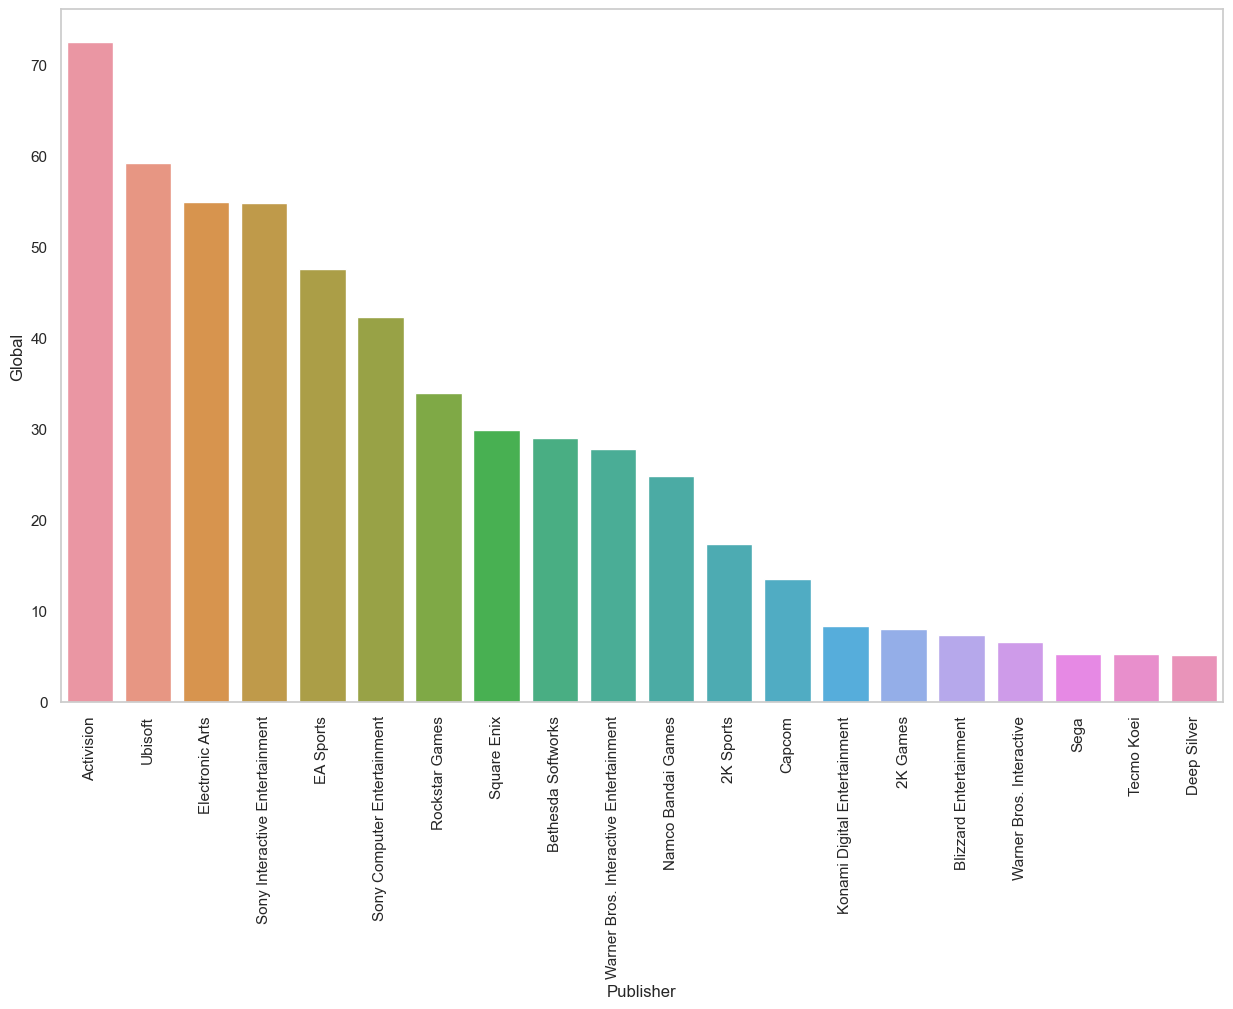

In [41]:
plt.figure(figsize=(15, 9))
sns.barplot(x='Publisher', y='Global', data=sale_pbl)
plt.xticks(rotation=90);

Несмотря на подавляющее большинство релизов игр от студий Namco Bandai Games и Sony Interactive Entertaintment, они проигрывают по продажам своих игр студии Activision. Хотя сама студия Activision не входит даже в топ-5 по количеству выпущенных игр.

## Сравнение издателей по продажам в каждом регионе

In [43]:
#Создаем новый датафрейм с издателями и регионами
comp_publisher = data[['Publisher', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']]
comp_publisher.head()

,Publisher,North America,Europe,Japan,Rest of World,Global
0,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Activision,6.18,6.05,0.41,2.44,15.09
2,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Activision,4.67,6.21,0.40,2.12,13.40
4,EA Sports,1.27,8.64,0.15,1.73,11.80


In [44]:
#Группируем данные в таблице по издателю и суммируем значение продаж для каждого издателя. Затем сортируем в порядке убывания 
#по глобальным продажам
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global'], ascending=False)

#Выбираем топ-20
comp_publisher = comp_publisher.head(20)
# comp_publisher

In [45]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], 
                         value_vars=['North America', 'Europe', 'Japan', 'Rest of World'], 
                         var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Activision,North America,28.20
1,Ubisoft,North America,18.50
2,Electronic Arts,North America,17.05
3,Sony Interactive Entertainment,North America,21.07
4,EA Sports,North America,15.18
...,...,...,...
75,Blizzard Entertainment,Rest of World,1.17
76,Warner Bros. Interactive,Rest of World,1.06
77,Sega,Rest of World,0.61
78,Tecmo Koei,Rest of World,0.61


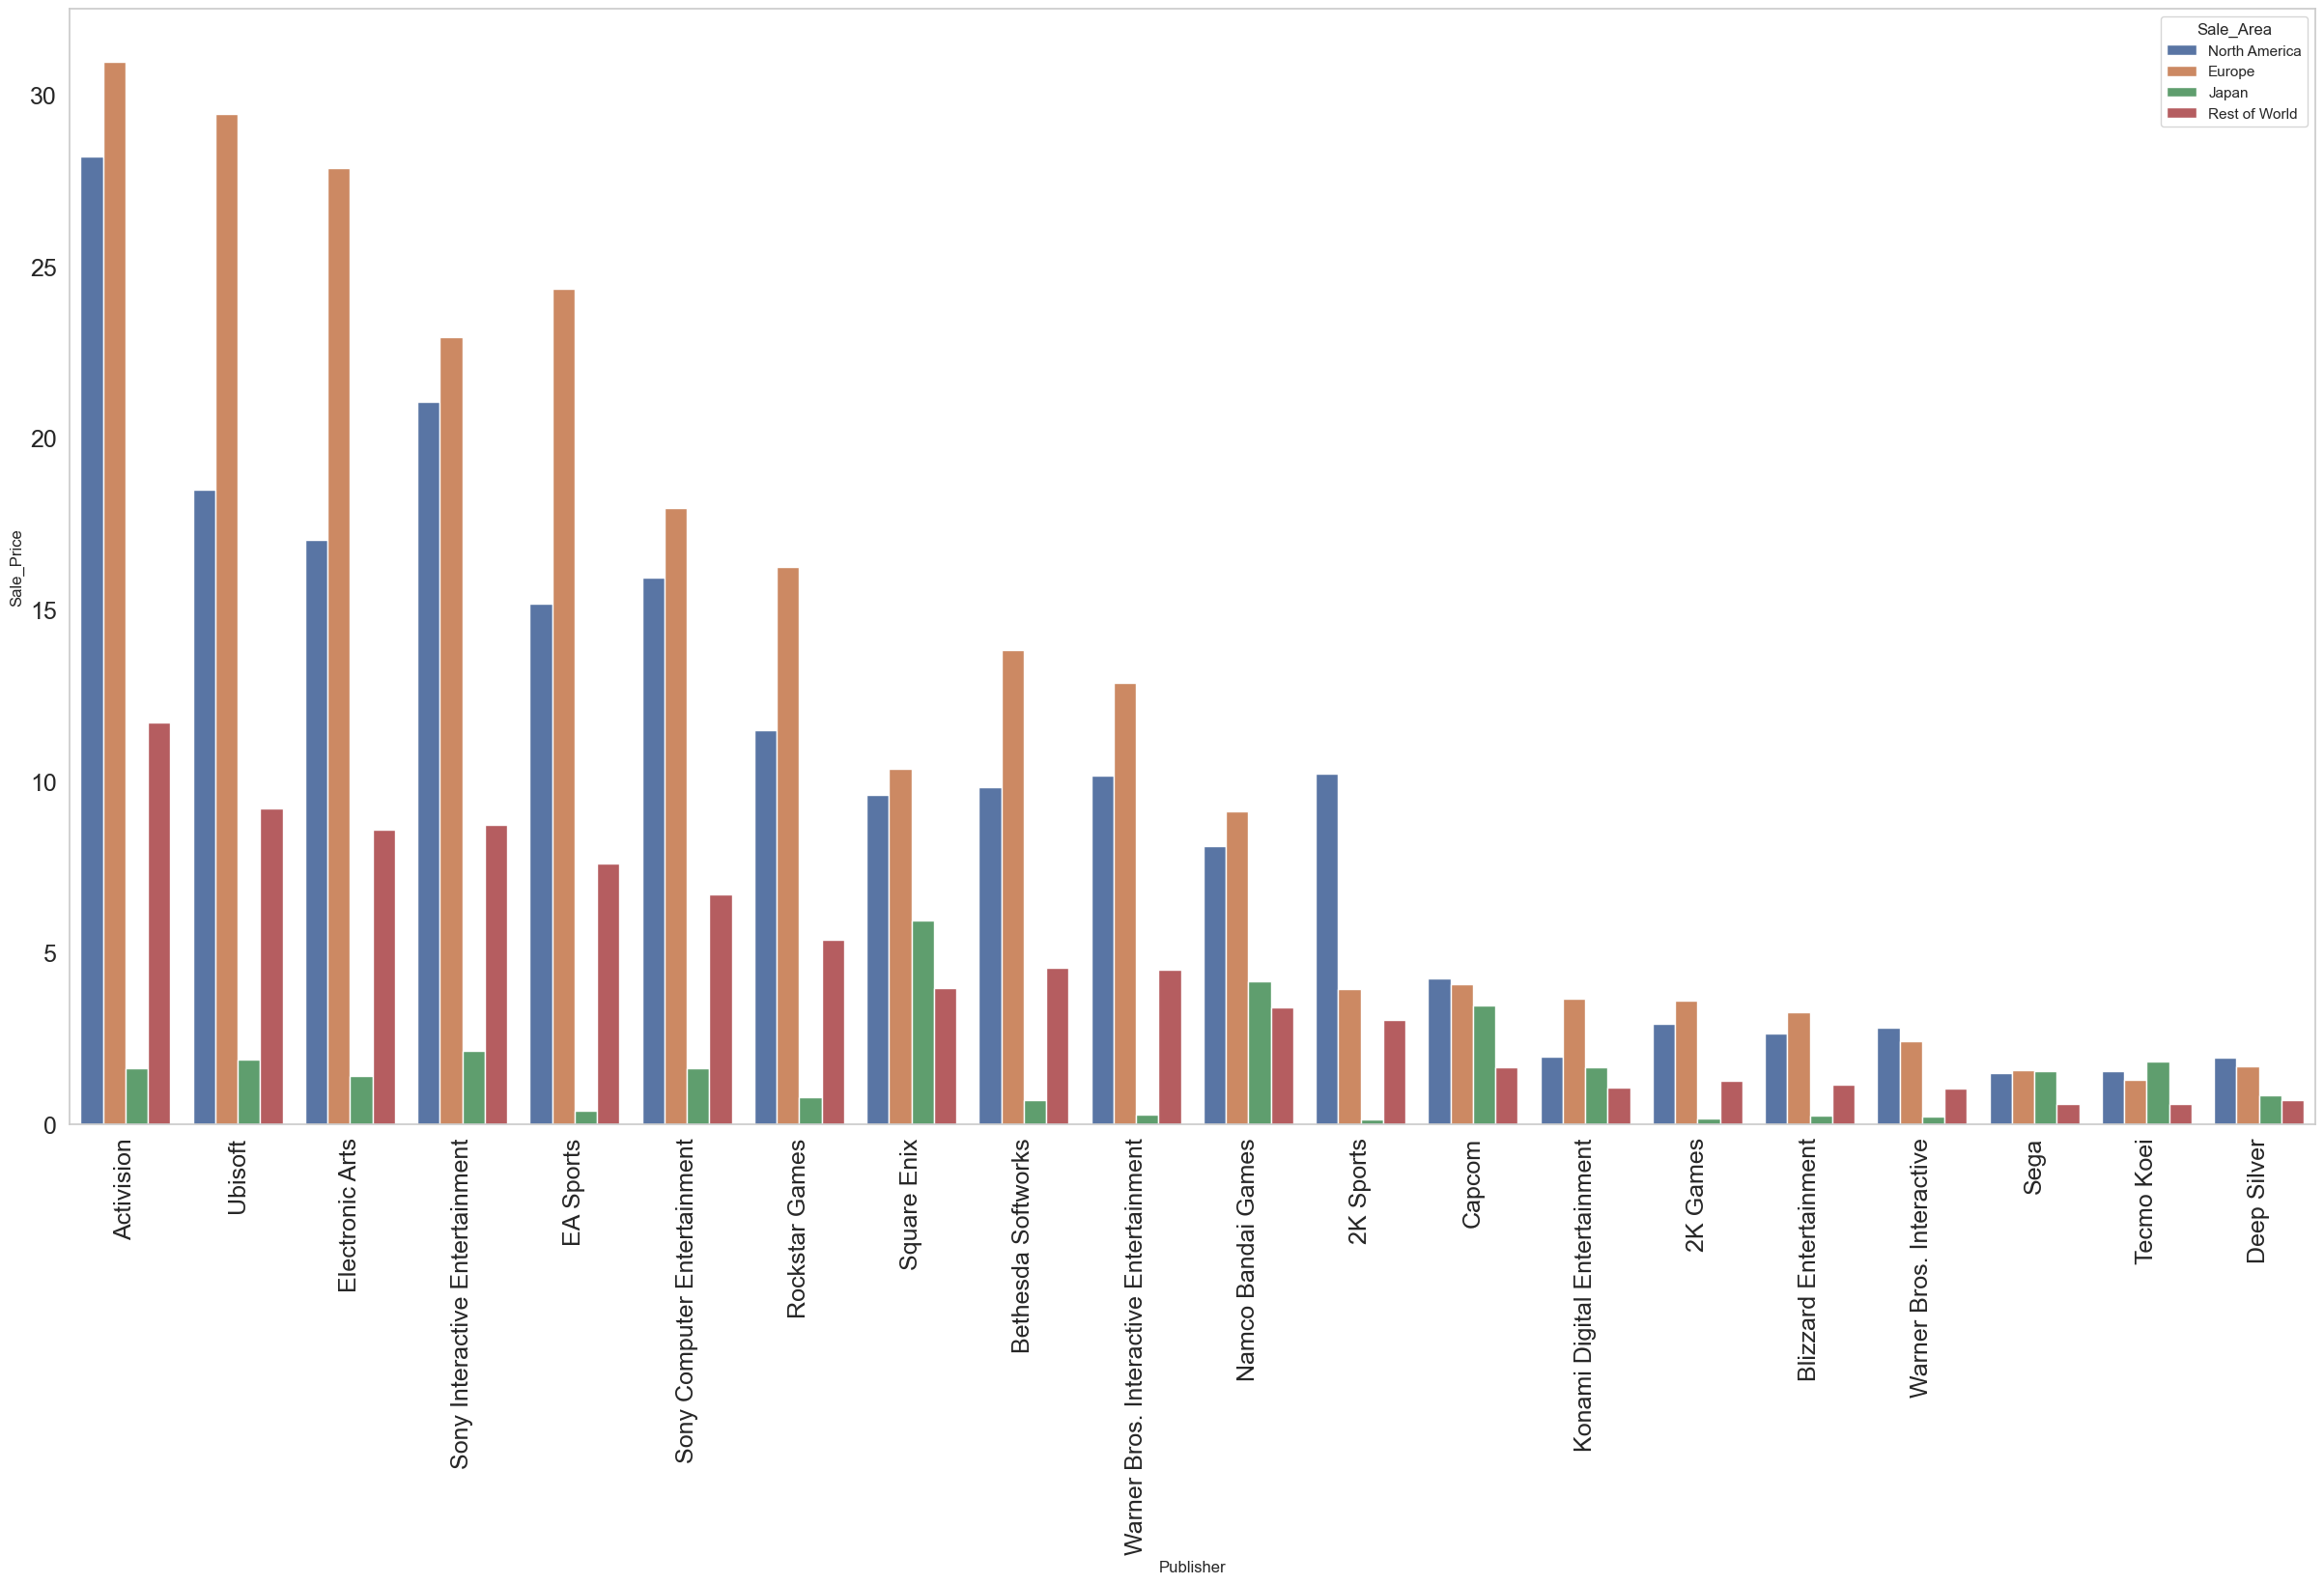

In [46]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

Можно заметить, что лидер по релизам игр, студия Namco Bandai Games, полностью проигрывыет по продажам игр вы всех регионах. Но это вторая по популярности студия в Японии (на 1 месте Square enix). Что интересно, обе эти студии базируются в Японии, наверно поэтому они так популярны в своей стране. 
По остальным студиям лидирующие продажи наблюдаются в Европе, кроме 2K Sports. Они лидируют в Северной Америки, т.к. подавляющее большинство их игр - это симулятор NBA.

## Лучший издатель по количеству игр по годам

In [47]:
top_publisher =  data[['Year', 'Publisher']]

#Группируем данные по году и издателю, считаем количество игр по издателю
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')

#Выбираем наибольшее количество игр, выпущенных издателем в каждом году
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)

#Если несколько издателей выпустили одинаковое количество игр в год, выбираем последний из них
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [48]:
publisher= top_publisher_count['Publisher']

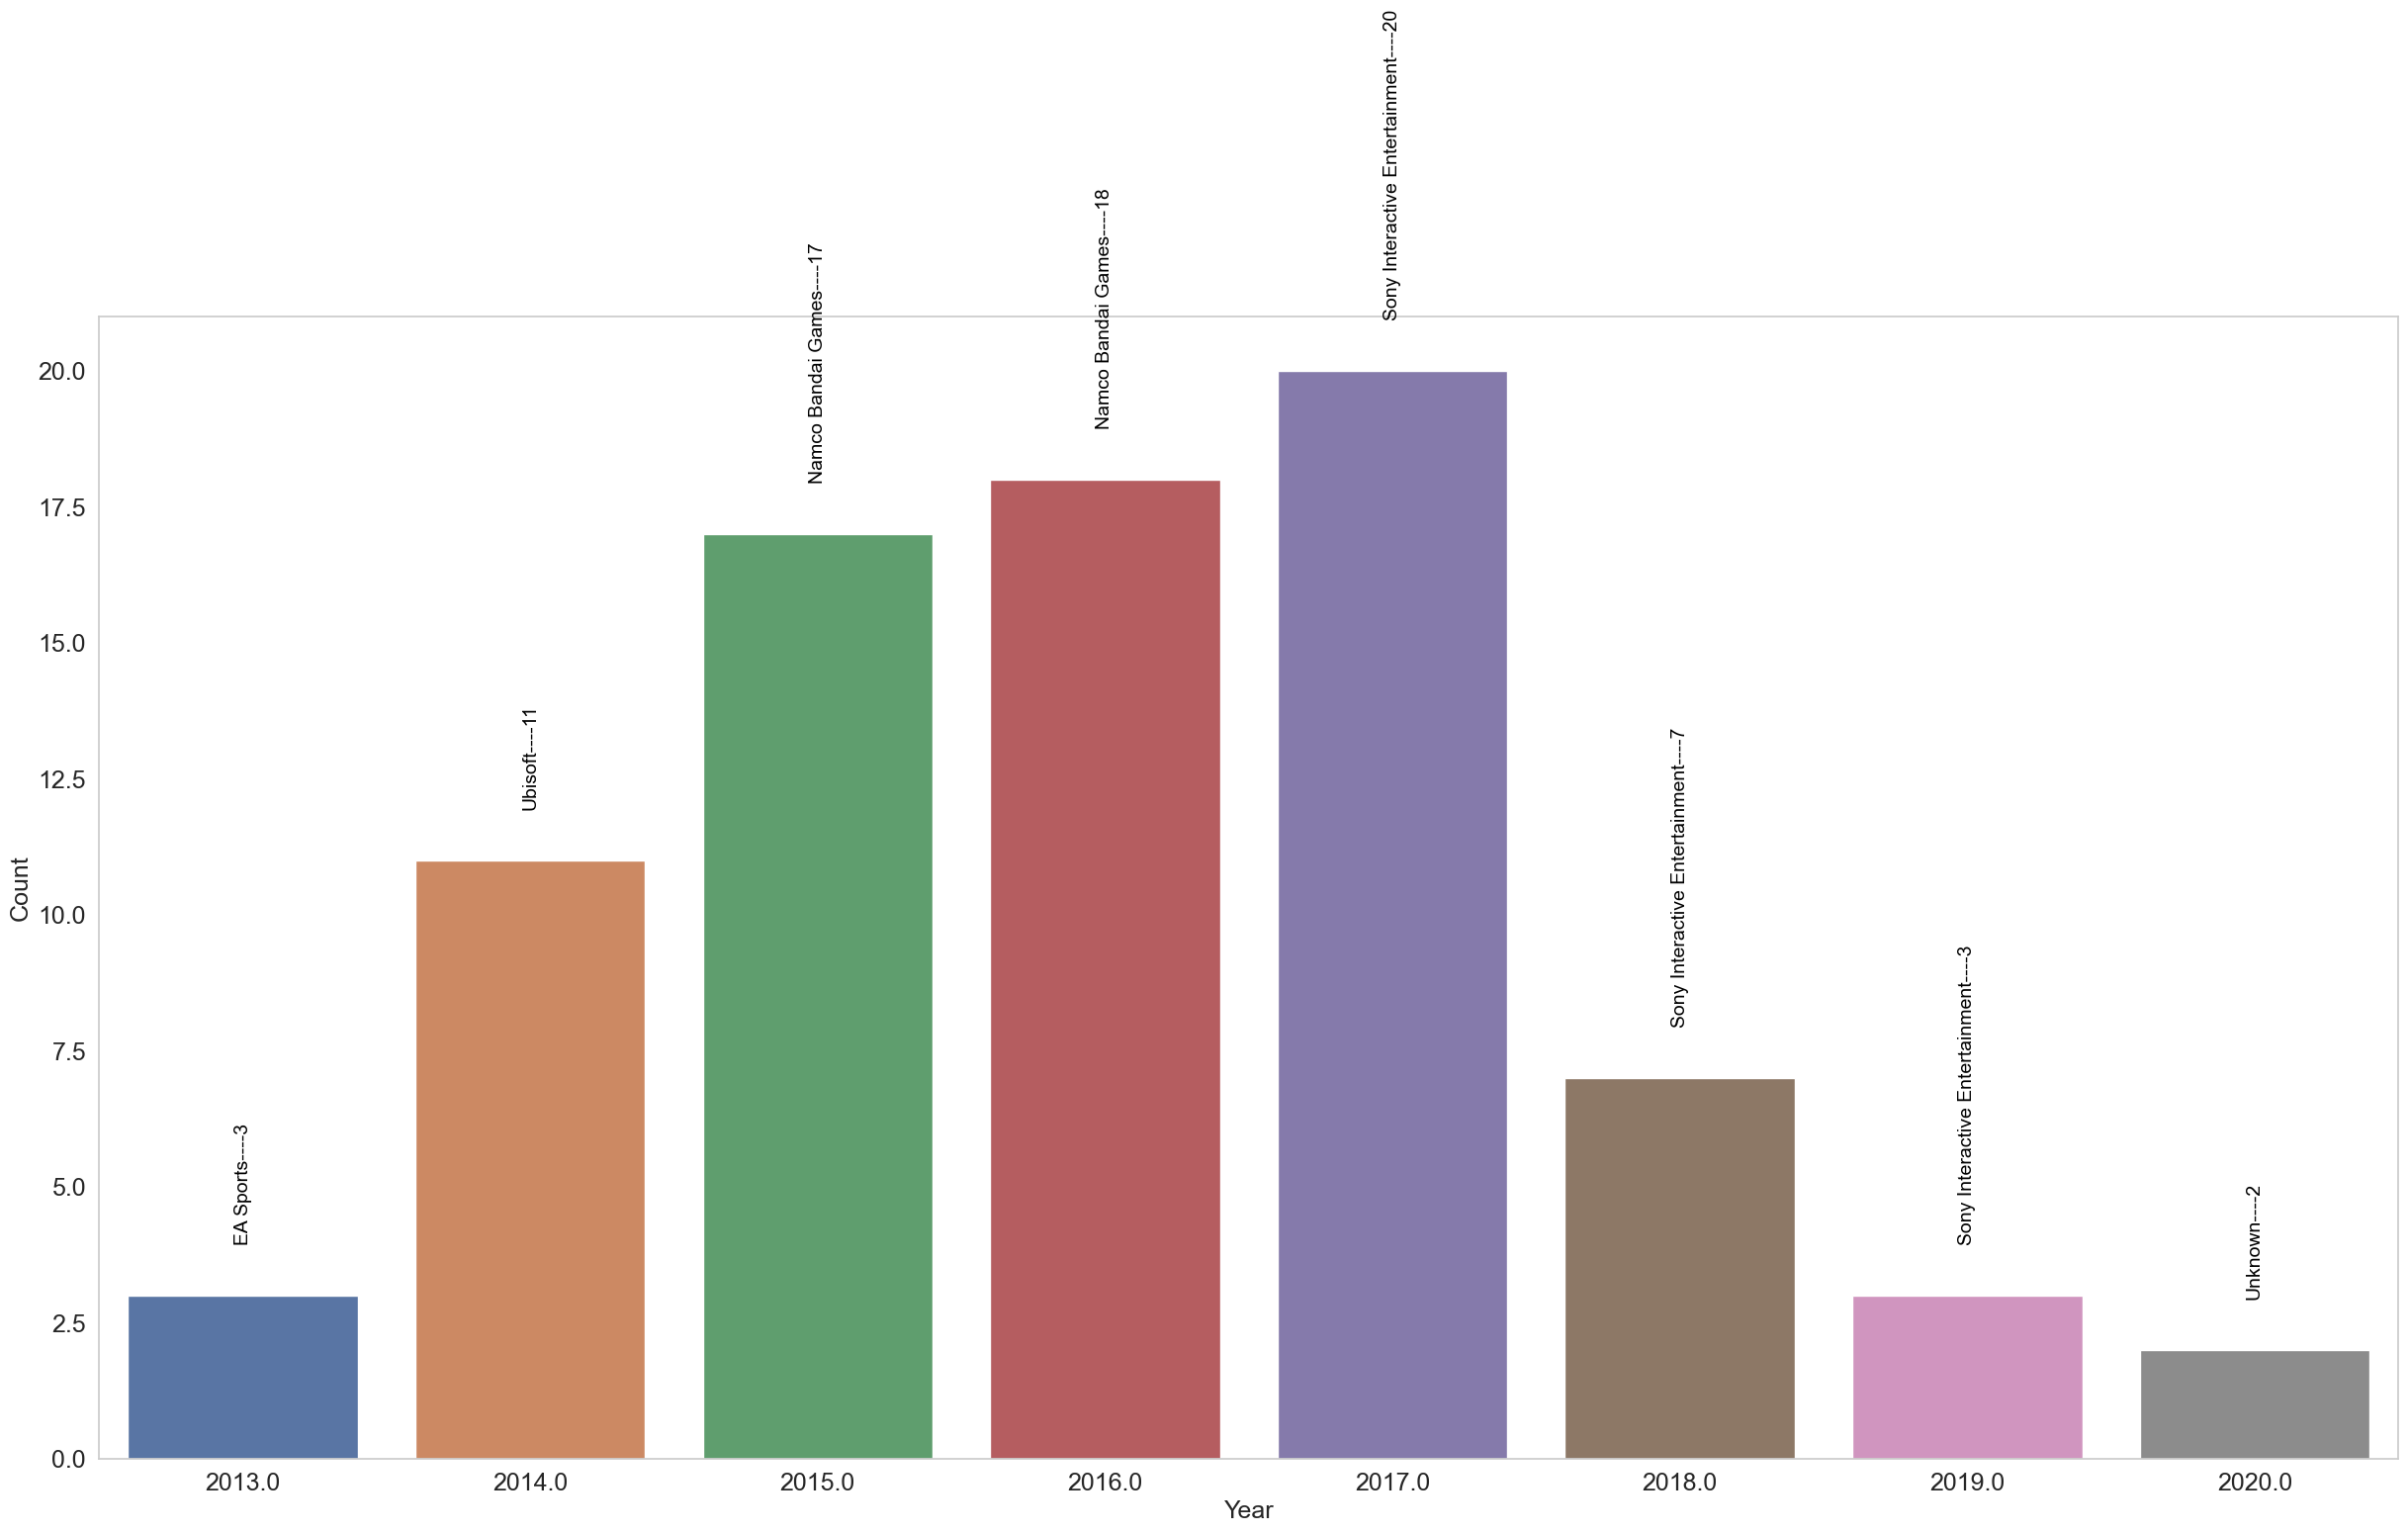

In [50]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 1, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Год за годом менялись лидирующие издатели по количеству игр, только 2 студии, Namco Bandai Games и Sony Interactive Entertaintment, были популярны более 1 года (2 и 3 года подряд соответственно).

## Общий доход по всем регионам

In [51]:
#Выбираем из исходного датафрейма столбцы, соответствующие продажам по регионам
top_sale_reg = data[['North America', 'Europe', 'Japan', 'Rest of World']]

# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
#Суммируем продажи по всем играм для каджого региона
top_sale_reg = top_sale_reg.sum().reset_index()

#Создает новый датафрейм top_sale_reg из полученных данных, присваивая столбцам имена region (регион) и sale (продажи).
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,North America,211.57
1,Europe,257.17
2,Japan,34.78
3,Rest of World,92.04


<AxesSubplot: xlabel='region', ylabel='sale'>

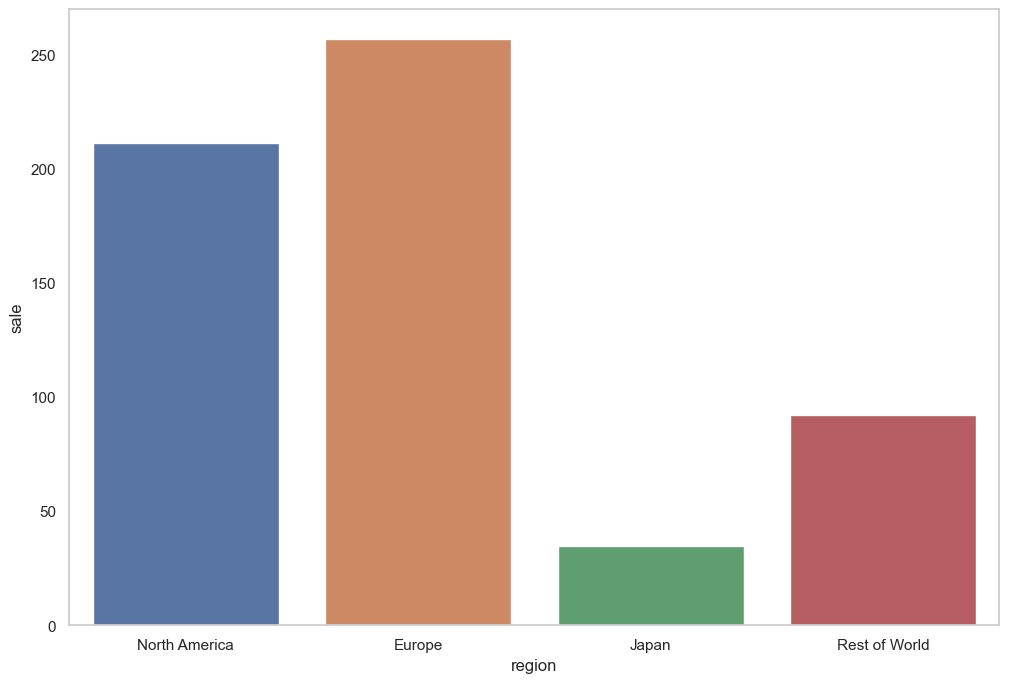

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [53]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

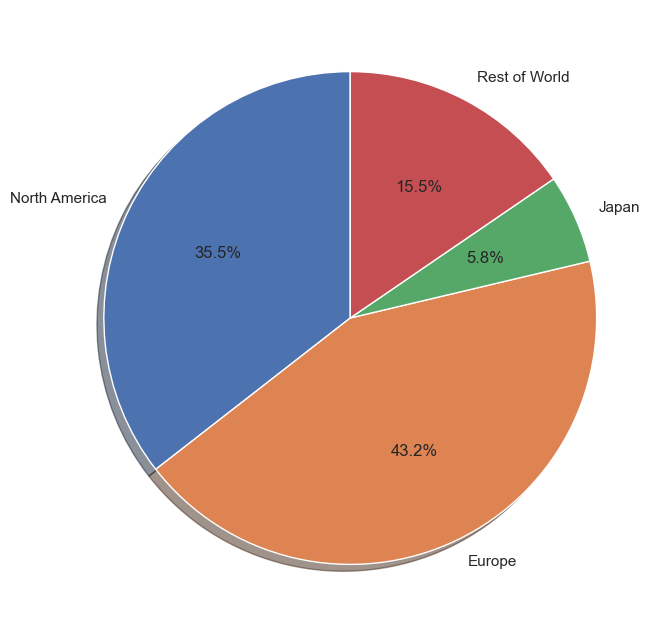

In [54]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90);

По продажам видеоигр Европа вместе с Северной Америкой занимают почти 80% всего рынка. Но лидирует все еще Европа.

# Общие выводы

1. Были выявлены годы самой высокой производительности студий разработки игр для PS4 (2014-2017гг), определены самые популярные и перспективные жанры и отдельные игры.

2. Показано, что количество игр не всегда влияет на общее количество продаж, например, студия Activision, имея практически в 2 раза меньше игр, опередила по количеству вырученных денег Namco Bandai Games больше чем в 2 раза.

3. Вывели закономерности предпочтений разных жанров и игр по регионам. По всему миру, кроме Японии, лидирующими по продажам являются жанры Action и Shooter. Но в Японии преобладающее большинство предпочитает игры в жанре Role-Playing. Игры-симуляторы баскетбола и бейсбола набрали бОльшую популярность в Северной Америке.